In [58]:
#importando bibliotecas

import numpy as np #trabalhar com numeros
import pandas as pd #manipulação de dados

import random #necessário para ultilizar o módulo
from random import randint


import matplotlib.pyplot as plt


In [59]:
#lendo os dados
bd = pd.read_csv('sic-rotulado.csv')

#verificando as 5 primeiras linhas
bd.head()

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,NeighborhoodConnectivity,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,Stress,TopologicalCoefficient,Role
0,7.284477,0.003115,0.137278,0.214286,24,14,False,3.000000,24,8,0.934537,421940,0.250000,1
1,7.285516,0.001038,0.137259,0.400000,16,14,False,4.000000,16,5,0.934526,210960,0.333333,1
2,6.289328,0.005531,0.159000,0.466667,12,13,False,7.833333,12,6,0.944903,773476,0.290123,2
3,5.621275,0.007808,0.177896,0.181818,30,13,False,8.750000,30,12,0.951862,1181032,0.128676,1
4,5.477131,0.000479,0.182577,0.523810,16,13,False,22.285714,16,7,0.953363,121978,0.327731,2


In [60]:
#y recebe apenas a coluna role
y = bd.iloc[:,13].values

In [61]:
#conta ocorrências da coluna Role por atributo
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{1: 492,
 2: 526,
 7: 58,
 8: 3,
 9: 1,
 1002: 5,
 1004: 1,
 1006: 1,
 1009: 3,
 1010: 11,
 1011: 2,
 1012: 1,
 1013: 1,
 1015: 1,
 1033: 1,
 1035: 2,
 1041: 4,
 1042: 1,
 1045: 2,
 1052: 2,
 1056: 1,
 1060: 1,
 1065: 1}

In [62]:
role = [1, 2, 7, 8, 9, 1002, 1004, 1006, 1009, 1010, 1011, 1012, 1013, 1015, 1033, 1035, 1041, 1042, 1045, 1052, 1056, 1060, 1065]

In [63]:
type(role[1])

int

In [64]:
vetor = list(range(30))

for I in range(30):

        rand = []
        for v in range(1121):
            group = random.choice(role)
            rand.append(group)

        bd["Random"]=rand

        total_iguais = np.sum(bd['Role'] == bd['Random'])
        total = len(bd)
        acuracia = total_iguais / total
        
        vetor[I] = acuracia

In [65]:
print(f'Acuracia: {acuracia} ')

Acuracia: 0.03479036574487065 


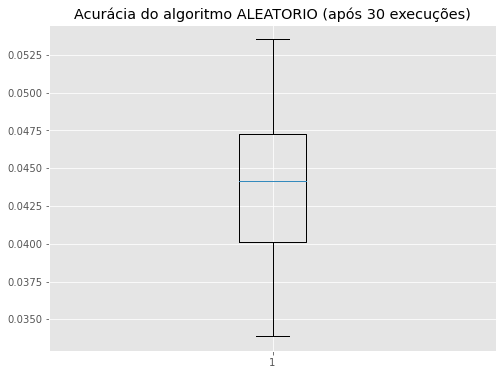

In [66]:
from importlib import reload
reload(plt) #recarregando configurações do plt (erro no gráfico)

plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.boxplot(vetor)
plt.title('Acurácia do algoritmo ALEATORIO (após 30 execuções)');

In [67]:
#removendo valores que podem causar vies na analise 

In [68]:
#conta ocorrências da coluna Role por atributo
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{1: 492,
 2: 526,
 7: 58,
 8: 3,
 9: 1,
 1002: 5,
 1004: 1,
 1006: 1,
 1009: 3,
 1010: 11,
 1011: 2,
 1012: 1,
 1013: 1,
 1015: 1,
 1033: 1,
 1035: 2,
 1041: 4,
 1042: 1,
 1045: 2,
 1052: 2,
 1056: 1,
 1060: 1,
 1065: 1}

In [69]:
#crio um novo Banco De Dados, neste seleciono os dados que somente apresentam na coluna ROLE os valores 1,2,7
#por serem os que mais se repetem
bd_mascara = bd['Role'].isin([1,2,7]) 
bd_filtrado = bd[bd_mascara]

In [70]:
bd_filtrado.head()

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,NeighborhoodConnectivity,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,Stress,TopologicalCoefficient,Role,Random
0,7.284477,0.003115,0.137278,0.214286,24,14,False,3.000000,24,8,0.934537,421940,0.250000,1,1065
1,7.285516,0.001038,0.137259,0.400000,16,14,False,4.000000,16,5,0.934526,210960,0.333333,1,1065
2,6.289328,0.005531,0.159000,0.466667,12,13,False,7.833333,12,6,0.944903,773476,0.290123,2,1013
3,5.621275,0.007808,0.177896,0.181818,30,13,False,8.750000,30,12,0.951862,1181032,0.128676,1,1035
4,5.477131,0.000479,0.182577,0.523810,16,13,False,22.285714,16,7,0.953363,121978,0.327731,2,1012


In [71]:
role = [1, 2, 7]

In [72]:
vetor = list(range(30))

for I in range(30):

    rand = []
    for v in range(1121):
        group = random.choice(role)
        rand.append(group)

    bd["Random"]=rand

    total_iguais = np.sum(bd['Role'] == bd['Random'])
    total = len(bd)
    acuracia = total_iguais / total
    
    vetor[I] = acuracia

In [73]:
print(f'Acuracia: {acuracia} ')

Acuracia: 0.30776092774308655 


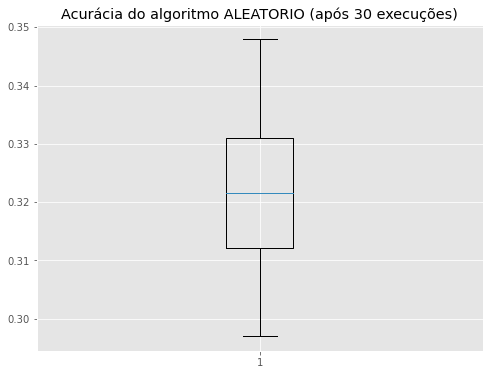

In [74]:
from importlib import reload
reload(plt) #recarregando configurações do plt (erro no gráfico)

plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.boxplot(vetor)
plt.title('Acurácia do algoritmo ALEATORIO (após 30 execuções)');